In [ ]:
from raspberry_listener.datatypes import Sensor, SensorData, SensorReading, SensorType
from raspberry_listener.remotereader import download_archive
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [ ]:
archive = download_archive()

In [ ]:
sensor_combinations = {"humidity": ["DHT11"], "temperature": ["DHT11","PI_CPU", "DS18B20"]}

In [ ]:
df = pd.read_parquet(archive)
df = SensorData.repair_dataframe(df)
print(df)

In [11]:
def lineplots(df: pd.DataFrame, sensor_type, sensor, native_pandas):
    def get_timeindexed_single_sensor_series(df: pd.DataFrame) -> pd.Series:
        single_sensor_df = df.loc[sensor_type, sensor]
        return single_sensor_df["reading"]
    ser = get_timeindexed_single_sensor_series(df)
    plt.figure()
    if native_pandas:
        ser.plot(title=f"{sensor_type}, {sensor}")
    else:
        plt.plot(ser.index.to_numpy(), ser.to_numpy())
        plt.xticks(rotation=30)
        plt.title(f"{sensor_type}, {sensor}")
    

In [12]:
def plot_all(native_pandas):
    for sensor_type, sensors in sensor_combinations.items():
        for sensor in sensors:
            lineplots(df, sensor_type, sensor, native_pandas)

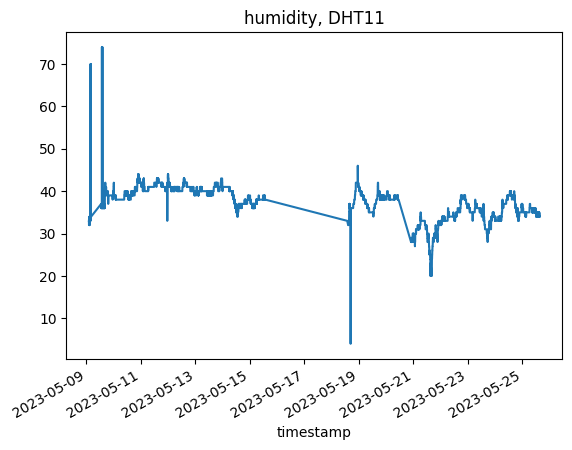

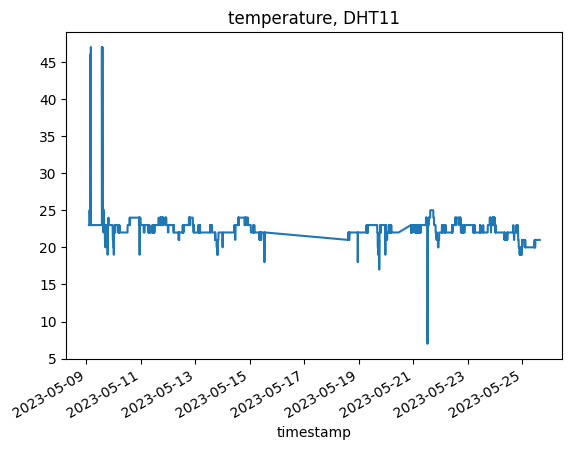

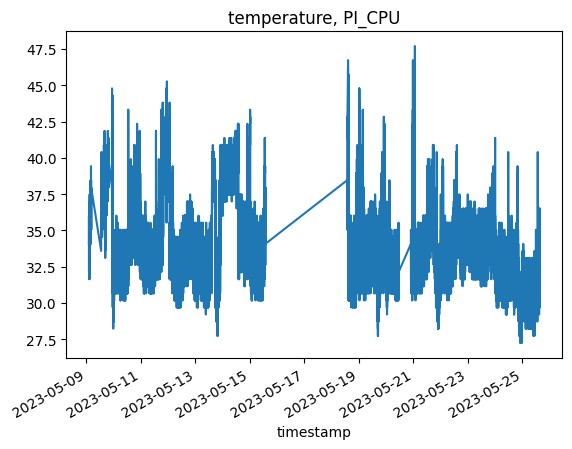

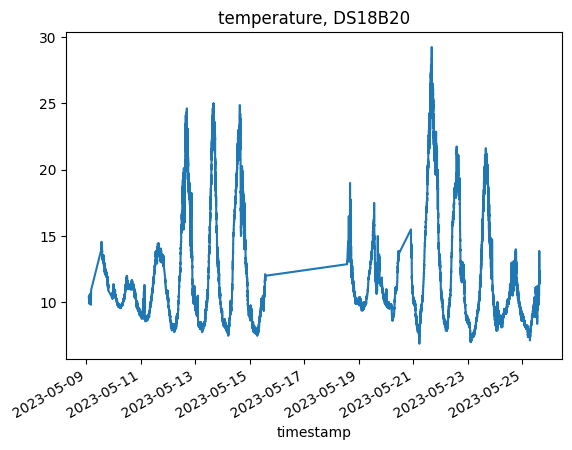

         311266 function calls (302460 primitive calls) in 4.127 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    2.493    0.623    2.493    0.623 {pandas._libs.tslibs.vectorized.ints_to_pydatetime}
        8    1.232    0.154    1.232    0.154 {built-in method pandas._libs.tslib.array_to_datetime}
        8    0.074    0.009    0.075    0.009 base.py:2205(is_unique)
        8    0.033    0.004    0.033    0.004 {method '__copy__' of 'numpy.ndarray' objects}
        4    0.027    0.007    0.027    0.007 {built-in method matplotlib._path.update_path_extents}
        4    0.024    0.006    4.045    1.011 core.py:444(generate)
      316    0.021    0.000    0.021    0.000 {method 'astype' of 'numpy.ndarray' objects}
       44    0.017    0.000    0.032    0.001 dates.py:321(_dt64_to_ordinalf)
      376    0.011    0.000    0.011    0.000 {method 'copy' of 'numpy.ndarray' objects}
        8    0.010    0.001    0.01

In [13]:
%prun plot_all(native_pandas = True)

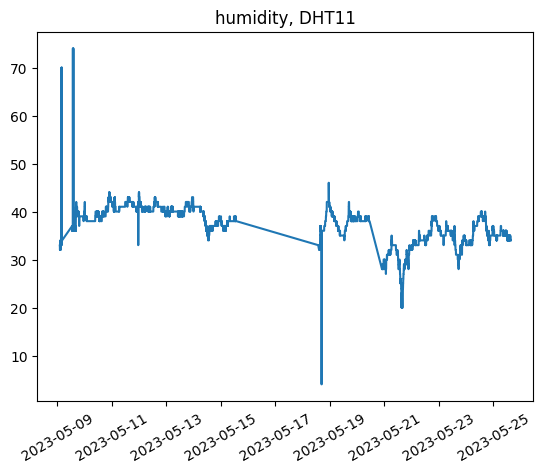

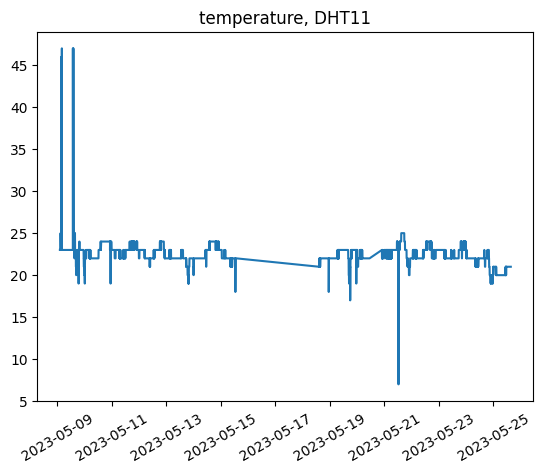

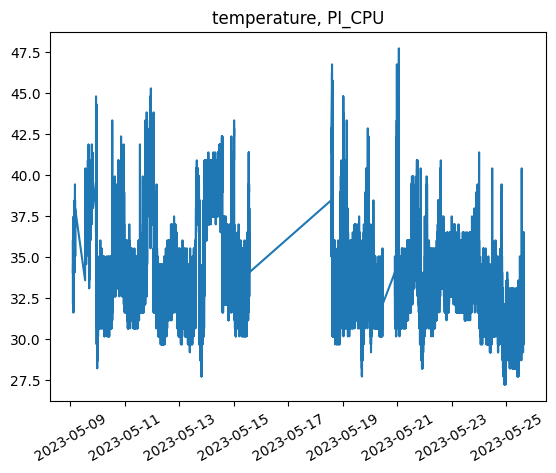

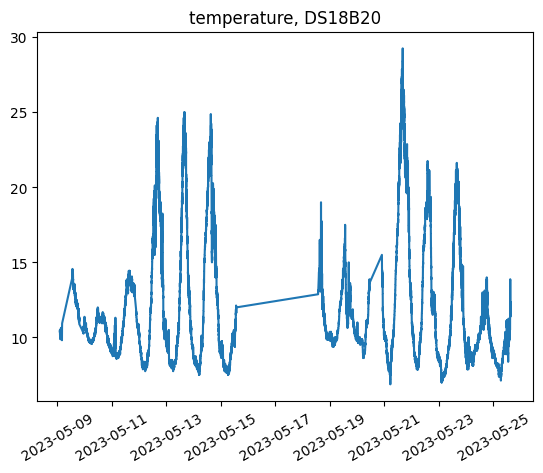

         254084 function calls (246320 primitive calls) in 0.202 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.026    0.006    0.026    0.006 {built-in method matplotlib._path.update_path_extents}
      196    0.019    0.000    0.019    0.000 {method 'astype' of 'numpy.ndarray' objects}
       24    0.016    0.001    0.030    0.001 dates.py:321(_dt64_to_ordinalf)
      896    0.009    0.000    0.009    0.000 {built-in method numpy.asarray}
        4    0.009    0.002    0.009    0.002 {method 'take' of 'numpy.ndarray' objects}
  684/508    0.006    0.000    0.008    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
  5236/84    0.004    0.000    0.008    0.000 copy.py:128(deepcopy)
     1004    0.004    0.000    0.016    0.000 artist.py:1180(_update_props)
        8    0.004    0.000    0.004    0.000 {method '__copy__' of 'numpy.ndarray' objects}
11304/10212    0.003    0.000   

In [14]:
%prun plot_all(native_pandas = False)

sensor_type  sensor 
temperature  DHT11      Axes(0.125,0.11;0.775x0.77)
             PI_CPU     Axes(0.125,0.11;0.775x0.77)
             DS18B20    Axes(0.125,0.11;0.775x0.77)
humidity     DHT11      Axes(0.125,0.11;0.775x0.77)
             PI_CPU                             NaN
             DS18B20                            NaN
Name: reading, dtype: object

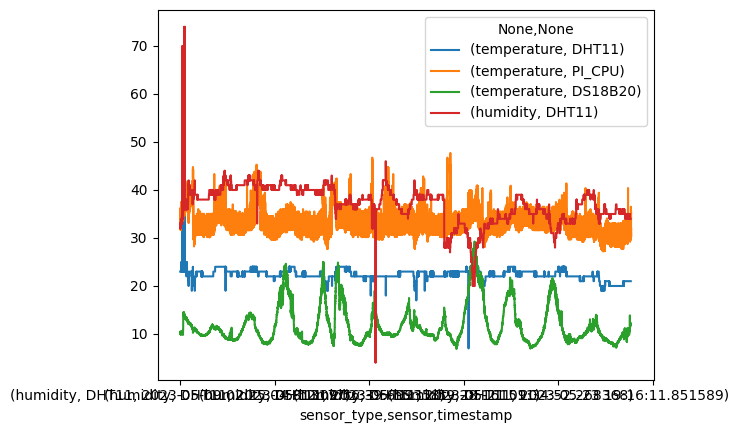

In [15]:

grouping = df.groupby(level=[0,1])
grouping['reading'].plot(legend=True)